In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
student_mat = pd.read_csv('~/Downloads/student/student-mat.csv', delimiter = ';')

In [4]:
print(student_mat)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
5       GP   M   16       U     LE3       T     4     3  services     other   
6       GP   M   16       U     LE3       T     2     2     other     other   
7       GP   F   17       U     GT3       A     4     4     other   teacher   
8       GP   M   15       U     LE3       A     3     2  services     other   
9       GP   M   15       U     GT3       T     3     4     other     other   
10      GP   F   15       U     GT3       T     4     4   teacher    health   
11      GP   F   15       U     GT3       T     2   

In [5]:
print("Shape of student_mat: {}".format(student_mat.shape))

Shape of student_mat: (395, 33)


In [78]:
# X = student_mat.drop(['G3', 'school', 'guardian'], axis=1)
X = student_mat.loc[:, ['G2', 'absences', 'G1']]
# X = student_mat.loc[:, ['G2', 'goout', 'absences', 'G1']]
y = student_mat['G3']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

* 1%台：`sex`、`Fedu`、`Fjob`、`paid`、`nursery`、`internet`、`famrel`、`Dalc`、`health`

* 2%台：`age`、`famsize`、`studytime`、`failures`

* 3~4%：`Medu`、`Mjob`、`reason`、`freetime`

* 5~10%：`goout`、`absences`、`G1`

* それ以上：`G2`

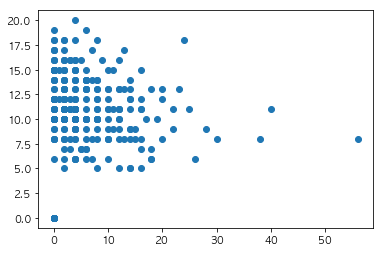

In [80]:
# plt.plot(student_mat['absences'], student_mat['G3'], 'o')
plt.plot(X_train['absences'], y_train, 'o')

In [81]:
# 片方0のデータを、ラベリングしておく
# plt.plot(student_mat['G2'], student_mat['G3'], 's')
# plt.plot(student_mat['G1'], student_mat['G3'], 'o')

# student_mat = student_mat[(student_mat['G2'] > 2) & (student_mat['G1'] > 2)]
# student_mat = student_mat[(student_mat['absences'] == 0) ]
# student_mat = student_mat['G2'].apply(lambda x: 0 if x['G3'] == 0)



# X_train.loc[(X_train['G2'] > 0) & (y_train == 0)] = X_train.loc[(X_train['G2'] > 0) & (y_train == 0)].G2 = 0
# plt.plot(X_train['G2'], y_train, 's')

# student_mat.loc[(student_mat['G2'] > 0) & (student_mat['G3'] == 0)] = student_mat.loc[(student_mat['G2'] > 0) & (student_mat['G3'] == 0)] .G2 = 0

# plt.plot(student_mat['G2'], student_mat['G3'], 's')

In [82]:
# student_mat.loc[(student_mat['G1'] > 0) & (student_mat['G3'] == 0)] = student_mat.loc[(student_mat['G1'] > 0) & (student_mat['G3'] == 0)] .G1 = 0

# plt.plot(student_mat['G1'], student_mat['G3'], 's')
# plt.plot(X_train['G1'], y_train, 's')

In [83]:
# 決定木
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.875
Accuracy on test set: 0.485


In [84]:
# 最小二乗法
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(lr.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(lr.score(X_test, y_test)))

Accuracy on training set: 0.845
Accuracy on test set: 0.783


Text(0, 0.5, 'G3')

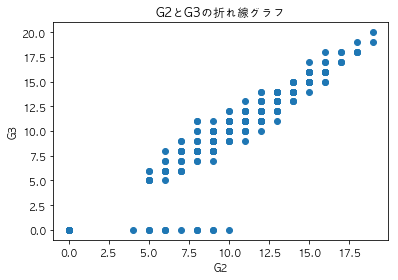

In [85]:
plt.plot(X_train['G2'], y_train, 'o')
plt.title("G2とG3の折れ線グラフ")
plt.xlabel("G2")
plt.ylabel("G3")

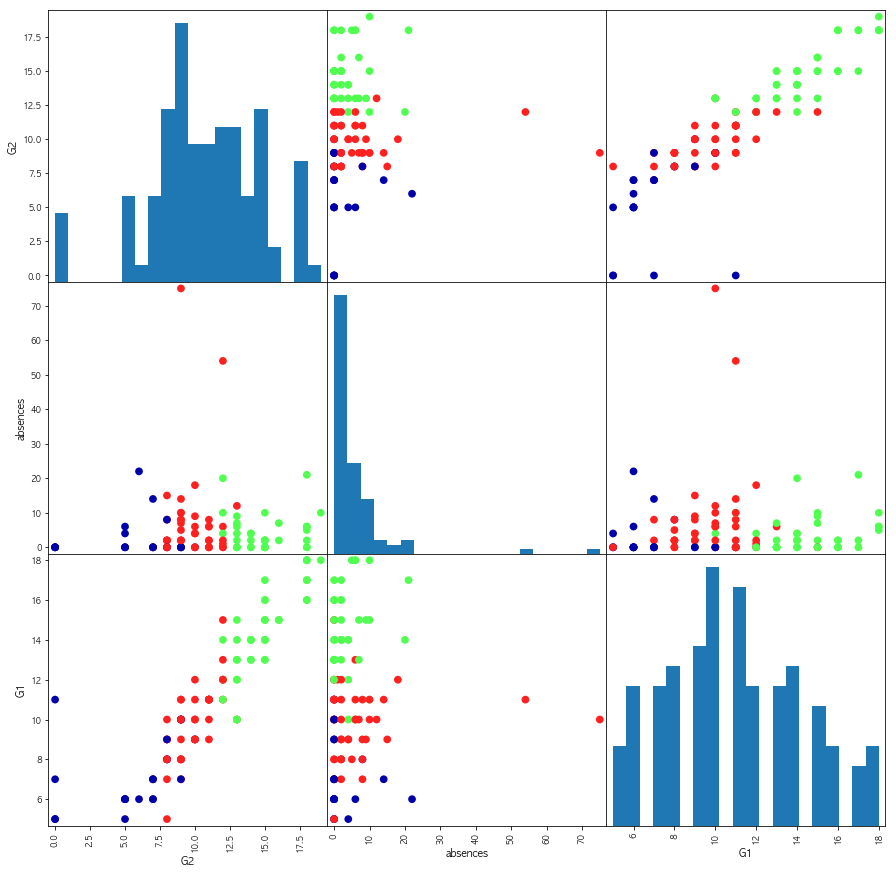

In [86]:
import mglearn

grr = pd.plotting.scatter_matrix(X_test, 
                                          c=y_test, 
                                          figsize=(15, 15), 
                                          marker='o',
                                          hist_kwds={'bins': 20},
                                          s=60,
                                          alpha=8,
                                          cmap=mglearn.cm3)

In [87]:
# import matplotlib.font_manager
# print(matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf'))

In [88]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'AppleGothic'

Text(0, 0.5, 'G3')

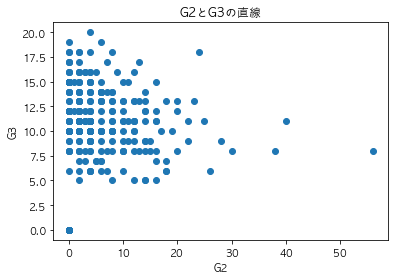

In [96]:
plt.plot(X_train['absences'], y_train, 'o')
plt.title("G2とG3の直線")
plt.xlabel("G2")
plt.ylabel("G3")

In [90]:
x = np.linspace(1, len(X), len(X))

# print(lr.coef_)
# print(lr.intercept_)
# fh = a * x + b
# plt.plot(x, fh, label="fh")
# plt.plot(X_train['G2'], y_train, 'o')